<a href="https://colab.research.google.com/github/femketenharkel/Predicting_Ratings/blob/main/models/clustering/K-Means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering



In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from joblib import Parallel, delayed
import joblib


In [2]:
# Load in the data
drive.mount('/content/drive')
df_final = pd.read_csv('/content/drive/My Drive/Thesis/Data/df_final_2.csv')

Mounted at /content/drive


In [3]:
# Exclude target variable and unique identifiers for clustering
df = df_final.drop(columns= ['Rating', 'MovieID', 'UserID'])

In [4]:
# Normalize the numerical features
scaler = MinMaxScaler()
features_to_scale = ['Year', 'Month', 'Day', 'Hour', 'Age', 'Release_year',
                       'Time_release_to_rating', 'Total_ratings_per_movie',
                       'Total_ratings_per_user' ]
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [5]:
df.head()

,Age,Year,Month,Day,Hour,Release_year,Time_release_to_rating,Total_ratings_per_movie,Total_ratings_per_user,Female,...,Favourite_Fantasy,Favourite_Film-Noir,Favourite_Horror,Favourite_Musical,Favourite_Mystery,Favourite_Romance,Favourite_Sci-Fi,Favourite_Thriller,Favourite_War,Favourite_Western
0,0.666667,0.0,0.363636,0.766667,0.086957,0.679012,0.317073,0.024511,0.047951,False,...,False,False,False,False,False,False,False,False,False,True
1,0.333333,0.0,0.636364,0.133333,0.652174,0.938272,0.060976,0.395390,0.102877,False,...,False,False,False,False,False,False,False,False,False,True
2,0.166667,0.0,0.909091,0.700000,0.695652,1.000000,0.000000,0.168077,0.244115,True,...,False,True,False,False,False,False,False,False,False,False
3,0.500000,0.0,0.636364,0.866667,0.956522,0.938272,0.060976,0.121681,0.309939,False,...,False,True,False,False,False,False,False,False,False,False
4,0.500000,0.0,0.636364,0.466667,0.782609,0.777778,0.219512,0.422235,0.361378,False,...,False,True,False,False,False,False,False,False,False,False


In [6]:
# Decide on cluster size using the Elbow method -> up to 60 clusters
# Ensure the sample size is at least 2 times the number of clusters
cluster_range = range(40000, 90001, 10000)
WCSS = []

# Calculate the within-cluster sum of squares for each number of clusters
for k in cluster_range:
    if k <= len(df) // 2:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df)
        WCSS.append(kmeans.inertia_)

# Plot the results to find the elbow point
plt.figure(figsize=(15, 6))
plt.plot(cluster_range, WCSS, marker='o')
plt.grid(axis='y', linewidth=0.5)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.axvline(x=80000, color='r', linestyle='--')  # Highlight 70000 clusters
plt.show()

KeyboardInterrupt: 

In [ ]:
# df_final_K-Means_clustering4 -> 80 k
# Determine Silhouette score for optimal k
optimal_k = 80000

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df)

# Assign cluster labels
labels = kmeans.labels_
df['Cluster'] = labels

# Calculate silhouette score
silhouette_avg = silhouette_score(df, labels)

print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg}')

# Assign cluster labels to df_final (not normalized, as input for RF and GB)
df_final['Cluster'] = df['Cluster']
df_final.to_csv('/content/drive/My Drive/Thesis/Data/df_final_K-Means_clustering4.csv', index=False)

Silhouette Score for 80000 clusters: 0.7918929406970499


# OLD CODE

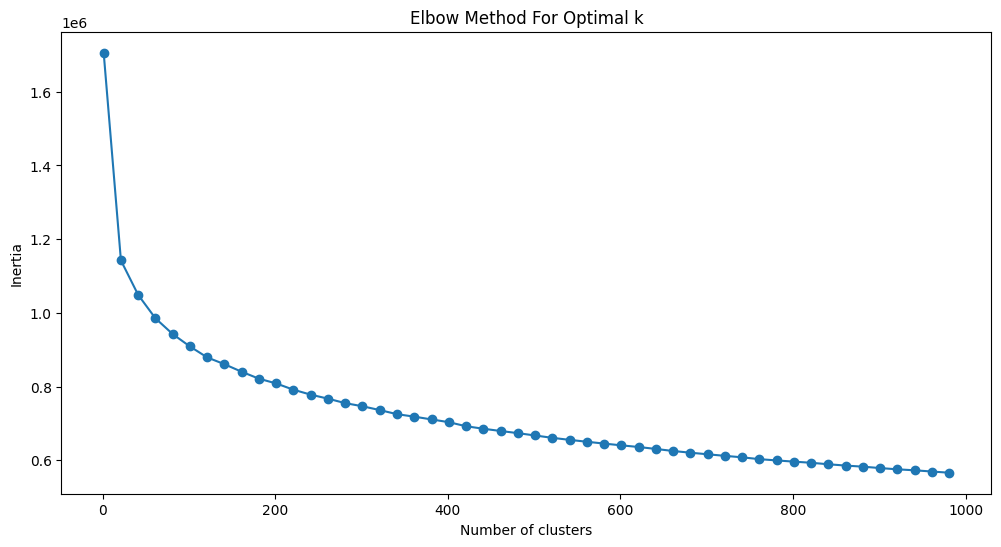

In [ ]:
# Decide on cluster size using the Elbow method

# Range of clusters to evaluate
cluster_range = range(1, 1000, 20)
inertia = []

# Calculate the within-cluster sum of squares for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plot the results to find the elbow point
plt.figure(figsize=(12, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# df_final_K-Means_clustering2 -> 50K
# Determine Silhouette score for optimal k
optimal_k = 50000

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df)

# Assign cluster labels to df_final (not normalized, as input for
# supervised learning)
labels = kmeans.labels_
df['cluster'] = labels

# Calculate silhouette score
silhouette_avg = silhouette_score(df, labels)

print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg}')

df_final['Cluster'] = df['cluster']
df_final.to_csv('/content/drive/My Drive/Thesis/Data/df_final_K-Means_clustering2.csv', index=False)

Silhouette Score for 50000 clusters: 0.7780499291216083


In [ ]:
# df_final_K-Means_clustering3 -> 55 k
# Determine Silhouette score for optimal k
optimal_k = 55000

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df)

# Assign cluster labels to df_final (not normalized, as input for
# supervised learning)
labels = kmeans.labels_
df['cluster'] = labels

# Calculate silhouette score
silhouette_avg = silhouette_score(df, labels)

print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg}')

df_final['Cluster'] = df['cluster']
df_final.to_csv('/content/drive/My Drive/Thesis/Data/df_final_K-Means_clustering3.csv', index=False)

Silhouette Score for 55000 clusters: 0.7828517946700235


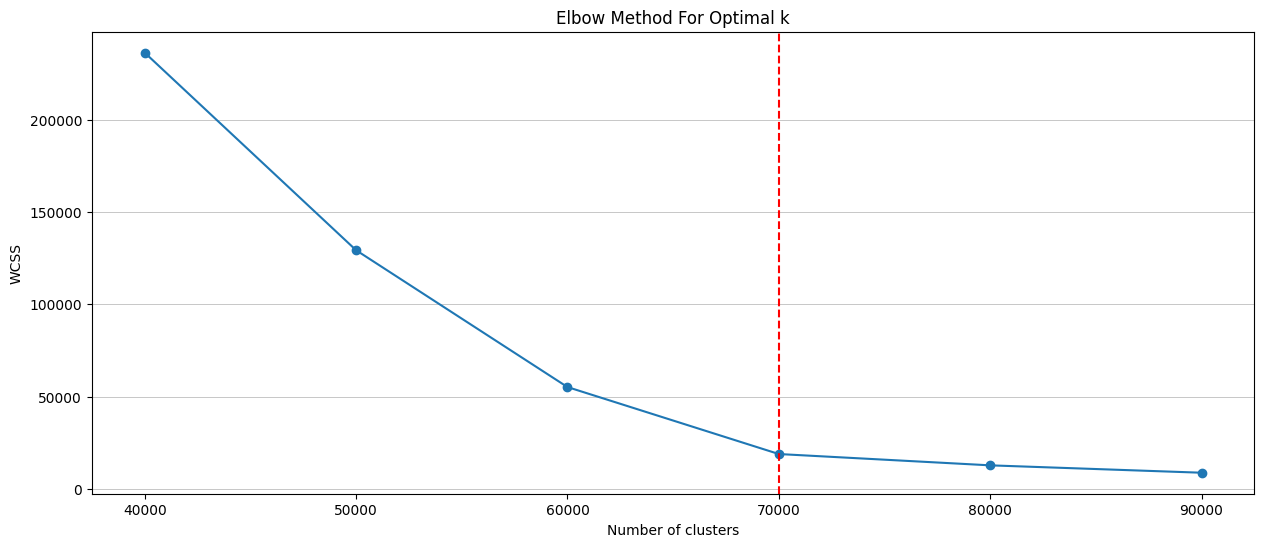

In [ ]:
# Sample df for improved efficiency
sample_fraction = 0.5
df_sampled = shuffle(df).sample(frac=sample_fraction, random_state=42)

# Decide on cluster size using the Elbow method -> up to 60 clusters
# Ensure the sample size is at least 2 times the number of clusters
cluster_range = range(40000, 90001, 10000)
WCSS = []

# Calculate the within-cluster sum of squares for each number of clusters
for k in cluster_range:
    if k <= len(df_sampled) // 2:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df_sampled)
        WCSS.append(kmeans.inertia_)

# Plot the results to find the elbow point
plt.figure(figsize=(15, 6))
plt.plot(cluster_range, WCSS, marker='o')
plt.grid(axis='y', linewidth=0.5)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.axvline(x=70000, color='r', linestyle='--')  # Highlight 70000 clusters
plt.show()

In [ ]:
# df_final_K-Means_clustering5 -> 70 k
# Determine Silhouette score for optimal k
optimal_k = 70000

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df)

# Assign cluster labels
labels = kmeans.labels_
df['Cluster'] = labels

# Calculate silhouette score
silhouette_avg = silhouette_score(df, labels)

print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg}')

# Assign cluster labels to df_final (not normalized, as input for RF and GB)
df_final['Cluster'] = df['Cluster']
df_final.to_csv('/content/drive/My Drive/Thesis/Data/df_final_K-Means_clustering5.csv', index=False)

Silhouette Score for 70000 clusters: 0.7756139486340581


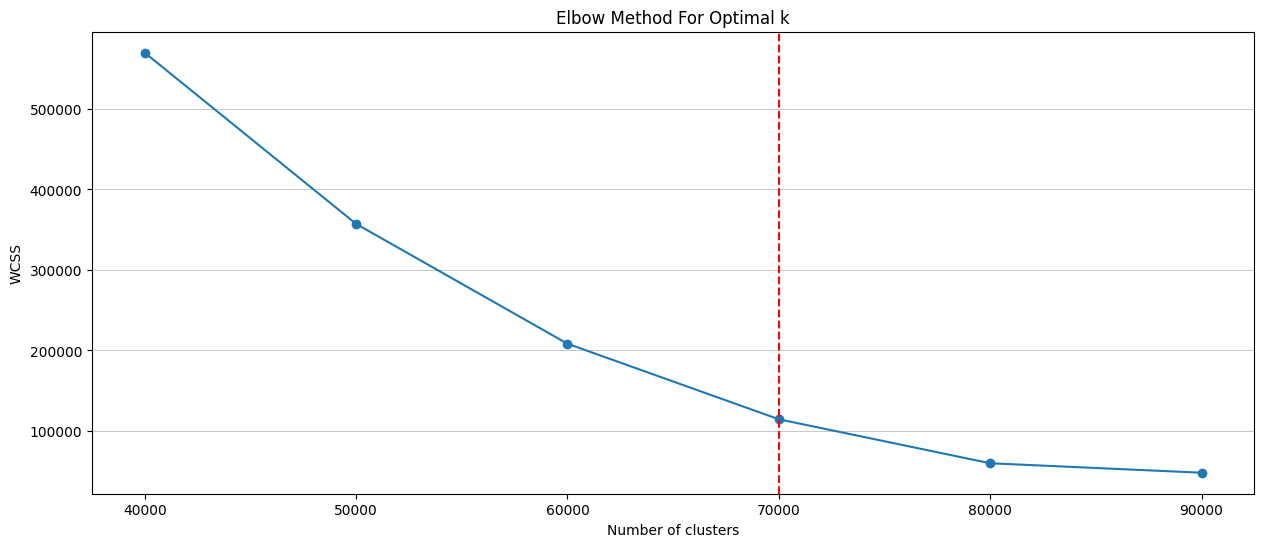

In [ ]:
# Decide on cluster size using the Elbow method -> up to 60 clusters
# Ensure the sample size is at least 2 times the number of clusters
cluster_range = range(40000, 90001, 10000)
WCSS = []

# Calculate the within-cluster sum of squares for each number of clusters
for k in cluster_range:
    if k <= len(df) // 2:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df)
        WCSS.append(kmeans.inertia_)

# Plot the results to find the elbow point
plt.figure(figsize=(15, 6))
plt.plot(cluster_range, WCSS, marker='o')
plt.grid(axis='y', linewidth=0.5)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.axvline(x=70000, color='r', linestyle='--')  # Highlight 70000 clusters
plt.show()